| | |
|-|-|
|Author(s) | [](), []() |

## Getting Started

### Install Vertex AI SDK for Python


In [ ]:
%pip install --upgrade --user --quiet google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 56.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

In [ ]:
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.


In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
# Use the environment variable if the user doesn't provide Project ID.
import os

import vertexai

PROJECT_ID = "vivid-argon-440517-e8"  # @param {type: "string", placeholder: "[your-project-id]" isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [ ]:
import IPython.display
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
    HarmBlockThreshold,
    HarmCategory,
    Part,
)

### Load the Gemini 1.5 Flash model

To learn more about all [Gemini API models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).


In [ ]:
MODEL_ID = "gemini-1.5-flash-002"  # @param {type:"string"}

model = GenerativeModel(MODEL_ID)

### Vertex AI SDK basic usage

Below is a simple example that demonstrates how to prompt the Gemini 1.5 Flash model using the Vertex AI SDK. Learn more about the [Gemini API parameters](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/gemini#gemini-pro).

In [ ]:
# Load a example model with system instructions
example_model = GenerativeModel(
    MODEL_ID,
    system_instruction=[
        "You are a great and smart property manager, you will describe properties in a best manner.",
        "Your mission is to generate a good advertisment text based on the images or text that i provide",
        "The advertisement text should be online posted to sites like facebook, craigslist"
    ],
)

# Set model parameters
generation_config = GenerationConfig(
    temperature=0.9,
    top_p=1.0,
    top_k=32,
    candidate_count=1,
    max_output_tokens=8192,
)

# Set safety settings
safety_settings = {
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
}

## Audio understanding

Gemini 1.5 Flash can directly process audio for long-context understanding.


#### Example 1: Summarization

#### Example 2: Transcription

## Video with audio understanding

Try out Gemini 1.5 Flash's native multimodal and long context capabilities on video interleaving with audio inputs.

In [ ]:
video_file_path = "cloud-samples-data/generative-ai/video/pixel8.mp4"
video_file_uri = f"gs://{video_file_path}"
video_file_url = f"https://storage.googleapis.com/{video_file_path}"

IPython.display.Video(video_file_url, width=450)

In [ ]:
prompt = """
  Provide a description of the video.
  The description should also contain anything important which people say in the video.
"""

video_file = Part.from_uri(video_file_uri, mime_type="video/mp4")
contents = [video_file, prompt]

response = model.generate_content(contents)
print(response.text)

Gemini 1.5 Flash model is able to process the video with audio, retrieve and extract textual and audio information.

## All modalities (images, video, audio, text) at once

Gemini 1.5 Flash is natively multimodal and supports interleaving of data from different modalities, it can support a mix of audio, visual, text, and
code inputs in the same input sequence.

In [ ]:
video_file_path = "cloud-samples-data/generative-ai/video/behind_the_scenes_pixel.mp4"
video_file_uri = f"gs://{video_file_path}"
video_file_url = f"https://storage.googleapis.com/{video_file_path}"

IPython.display.Video(video_file_url, width=450)

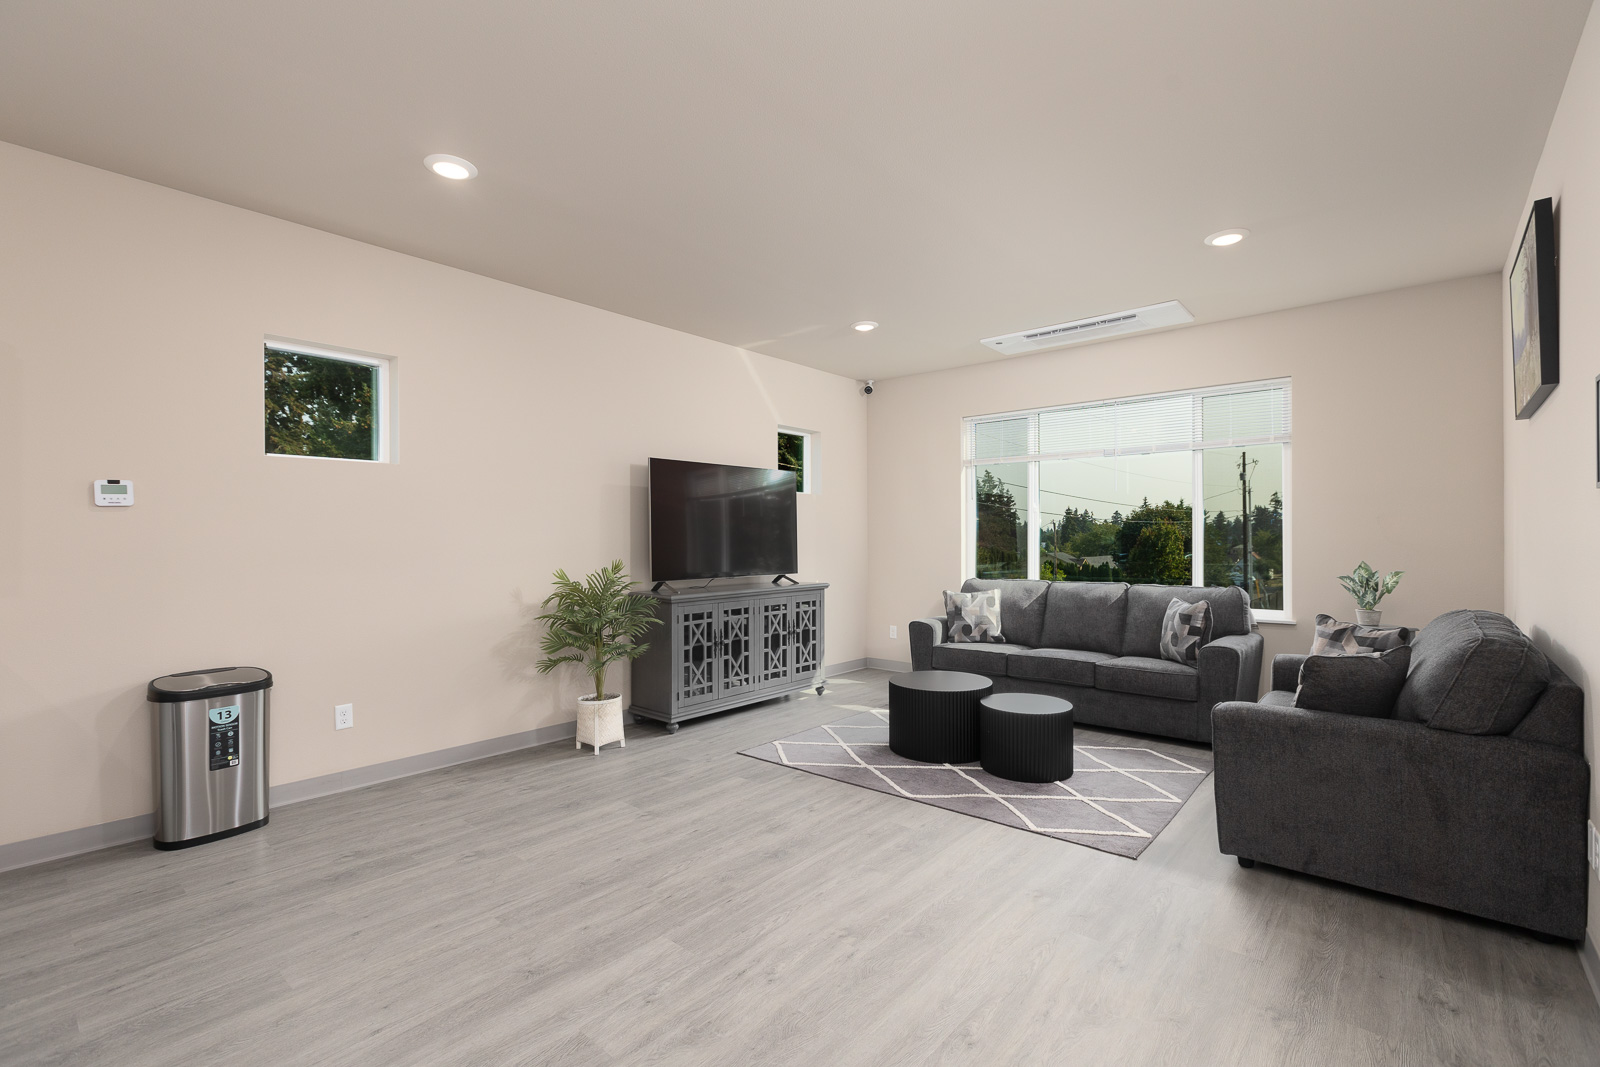

In [ ]:
image_file_path = "/content/902-904-Tacoma-13.jpg"
image_file_uri = "gs://reagent_data/902-904-Tacoma-15.jpg" #f"gs://{image_file_path}"
image_file_url = f"https://storage.googleapis.com/{image_file_path}"
image_file_url = "https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-13.jpg"

IPython.display.Image(image_file_url, width=450)

In [ ]:
image_file = Part.from_uri(image_file_url, mime_type="image/png")
files = [
  #"https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-13.jpg",
#"https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-21.jpg",
"https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-12.jpg",
#"https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-14.jpg",
"https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-15.jpg",

  #"https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-17.jpg",
  "https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-20.jpg",
     "https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-26.jpg",
     "https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-32.jpg",
     "https://storage.googleapis.com/gs_bucket_20/902-904-Tacoma-30.jpg",
    #  "https://storage.googleapis.com/gs_bucket_20/904-FP-1.jpg",
     "https://storage.googleapis.com/gs_bucket_20/904-FP-2.jpg",
     "https://storage.googleapis.com/gs_bucket_20/904-FP-3.jpg",
     "https://storage.googleapis.com/gs_bucket_20/904-FP-4.jpg",
]
images = [Part.from_uri(url, mime_type="image/png") for url in files]
contact_name = "Yolanda"
contact_email = "yoland@rentaigent"
agency_name = "AI Rental Agency"
location = "Tacoma, Washinton"
security_deposit ="two months"
category
prompt = f"""
  Look at the pictures uploaded and go through them in details and describe it in such a way renters love to see the house.
  Use the rent amount based on prevailing market condition at this location {location}. Availabilty current date + 10 days.
  Look for similar images and do not count it twice for num of bedrooms and bathrooms.
  Use liberty to use general rental ads information while generating the text.
  I have also uploading floor plans, please use it.
  This house is not Pet friendly, so for that.
  use securiyt deposit as {security_deposit}
  Use contact name as {contact_name} do not use email.
  Your name is {agency_name}
  Questions:
  - Generate rental post ad for the house show in the picture.
"""
images.append(prompt)
contents = images

response = model.generate_content(contents)
print(response.text)



Here's a rental ad incorporating the provided images and information, tailored to attract renters:

**Headline:** Spacious 5-Bedroom, 4-Bathroom House in Tacoma - Available October 27th!

**Image Gallery:**  [Include all provided images in a visually appealing gallery format, ideally a carousel or slider.]

**Description:**

Welcome home to this stunning 5-bedroom, 4-bathroom house in the heart of Tacoma, WA!  This beautifully renovated home offers a spacious and modern living experience, perfect for families or groups of roommates. 

**Key Features:**

* **Five generously sized bedrooms:** Each bedroom provides ample space for relaxation and personal comfort. Note, some bedrooms are on separate levels.
* **Four modern bathrooms:** No more morning bathroom rush!  Enjoy the convenience of multiple full bathrooms throughout the house.
* **Open-concept living area:** The bright and airy living room seamlessly flows into the dining area and kitchen, creating the perfect space for entertain

## Conclusion

In this tutorial, you've learned how to use Gemini 1.5 Flash with the Vertex AI SDK to:

- analyze audio for insights.
- understand videos (including their audio components).
- extract information from PDF documents.
- process images, video, audio, and text simultaneously.

In [ ]:
!npm install -g npm@latest
!npm cache verify
!npm install -g --unsafe-perm ijavascript
!ijsinstall --install=global
!jupyter-kernelspec list

npm ERR! code EBADENGINE
npm ERR! engine Unsupported engine
npm ERR! engine Not compatible with your version of node/npm: npm@10.9.0
npm ERR! notsup Not compatible with your version of node/npm: npm@10.9.0
npm ERR! notsup Required: {"node":"^18.17.0 || >=20.5.0"}
npm ERR! notsup Actual:   {"npm":"8.19.4","node":"v16.20.2"}

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2024-11-03T00_13_15_546Z-debug-0.log
Cache verified and compressed (~/.npm/_cacache)
Content verified: 235 (12441411 bytes)
Index entries: 235
Finished in 1.506s
npm notice 
npm notice New major version of npm available! 8.19.4 -> 10.9.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.9.0
npm notice Run npm install -g npm@10.9.0 to update!
npm notice 
npm WARN deprecated uuid@3.4.0: Please upgrade  to version 7 or higher.  Older versions may use Math.random() in certain circumstances, which is known to be problematic.  See https://v8.dev/blog/math-random for details.

In [ ]:
%%javascript

const { chromium } = require('playwright');

const FB_URL = 'https://www.facebook.com/';

const TEST_CREDENTIALS = {
  username: 'qiqimei1205@gmail.com',
  password: 'Pux2oCsy1w',
};
const EXAMPLE_PROPERTY_DETAILS = {
  title: '1B1B Suite Rental in a Newly Built 5B5B House',
  price: '1250',
  category: 'Property Rentals',
  propertyType: 'Apartment',
  rentalType: 'Rent',
  privateRoom: true,
  bathroomType: 'Private',
  bedrooms: '1',
  bathrooms: '1',
  address: '123 Main St, Tacoma, WA',
  description:
    'Private bathrooms, furnished common spaces, modern amenities like AC, mini-fridge, microwave. Prime location near PLU, QFC, Starbucks, parks, trails, and JBLM. Rent includes utilities.',
  location: 'Tacoma, WA',
  images: ['./tests/image/photo.jpg'],
  numberOfResidents: '1',
};

async function postFacebookMarketplaceListing(credentials, propertyDetails) {
  const browser = await chromium.launch({ headless: false });
  const context = await browser.newContext();
  const page = await context.newPage();

  await loginToFacebook(page, credentials);
  await createMarketplaceListing(page, propertyDetails);

  await browser.close();
}

async function loginToFacebook(page, credentials) {
  await page.goto(FB_URL);
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  await page.fill('input[name="email"]', credentials.username);
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.fill('input[name="pass"]', credentials.password);
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.click('button[name="login"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  await page.waitForNavigation(); // Wait for navigation to complete after login
}

async function createMarketplaceListing(page, propertyDetails) {
  // Navigate to Facebook Marketplace
  await page.goto('https://www.facebook.com/marketplace/create/rental');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  // Fill in the listing details
  await page.waitForSelector('label[aria-label="Home for Sale or Rent"]');
  await page.click('label[aria-label="Home for Sale or Rent"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('ArrowDown'); // Navigate to the desired option
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('Enter');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  await page.waitForSelector('label[aria-label="Rental type"]');
  await page.click('label[aria-label="Rental type"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('ArrowDown'); // Navigate to the desired option
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('Enter');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  if (propertyDetails.privateRoom) {
    await page.waitForSelector('input[aria-label="This is a private room in a shared property."]');
    await page.click('input[aria-label="This is a private room in a shared property."]');
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  await page.waitForSelector('label[aria-label="Bathroom Type"]');
  await page.click('label[aria-label="Bathroom Type"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('ArrowDown'); // Navigate to the desired option
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('Enter');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  // Fill in "How many people live here?"
  const labelHandle = await page.waitForSelector('label:has-text("How many people live here?")');
  const inputHandle = await labelHandle.$('input[type="text"]');
  if (inputHandle) {
    await inputHandle.fill(propertyDetails.numberOfResidents);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  const bedroomsLabelHandle = await page.waitForSelector('label:has-text("Number of bedrooms")');
  const bedroomsInputHandle = await bedroomsLabelHandle.$('input[type="text"]');
  if (bedroomsInputHandle) {
    await bedroomsInputHandle.fill(propertyDetails.bedrooms);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const bathroomsLabelHandle = await page.waitForSelector('label:has-text("Number of bathrooms")');
  const bathroomsInputHandle = await bathroomsLabelHandle.$('input[type="text"]');
  if (bathroomsInputHandle) {
    await bathroomsInputHandle.fill(propertyDetails.bathrooms);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const priceLabelHandle = await page.waitForSelector('label:has-text("Price per month")');
  const priceInputHandle = await priceLabelHandle.$('input[type="text"]');
  if (priceInputHandle) {
    await priceInputHandle.fill(propertyDetails.price);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const addressLabelHandle = await page.waitForSelector('label:has-text("Rental address")');
  const addressInputHandle = await addressLabelHandle.$('input[type="text"]');
  if (addressInputHandle) {
    await addressInputHandle.fill(propertyDetails.address);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
    await page.keyboard.press('ArrowDown'); // Select the first option from the dropdown
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
    await page.keyboard.press('Enter');
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const descriptionLabelHandle = await page.waitForSelector('label:has-text("Rental description")');
  const descriptionInputHandle = await descriptionLabelHandle.$('textarea');
  if (descriptionInputHandle) {
    await descriptionInputHandle.fill(propertyDetails.description);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  // Upload images
  const addPhotoButton = await page.waitForSelector('xpath=//span[text()="Add photos"]');
  for (const imagePath of propertyDetails.images) {
    const [fileChooser] = await Promise.all([
      page.waitForEvent('filechooser'),
      addPhotoButton.click(),
    ]);
    await fileChooser.setFiles(propertyDetails.images);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  // Click on 'Next' and complete the listing
  await page.waitForSelector('div[aria-label="Next"]');
  await page.click('div[aria-label="Next"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.waitForSelector('div[aria-label="Publish"]');
  console.log('Publishing listing...');
  // TODO: not publishing the listing for now
  //   await page.click('div[aria-label="Publish"]');
//   await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
}

postFacebookMarketplaceListing(TEST_CREDENTIALS, EXAMPLE_PROPERTY_DETAILS);

module.exports = { postFacebookMarketplaceListing };

<IPython.core.display.Javascript object>

In [ ]:
%%javascript

const { chromium } = require('playwright');

const FB_URL = 'https://www.facebook.com/';

const TEST_CREDENTIALS = {
  username: 'qiqimei1205@gmail.com',
  password: 'Pux2oCsy1w',
};
const EXAMPLE_PROPERTY_DETAILS = {
  title: '1B1B Suite Rental in a Newly Built 5B5B House',
  price: '1250',
  category: 'Property Rentals',
  propertyType: 'Apartment',
  rentalType: 'Rent',
  privateRoom: true,
  bathroomType: 'Private',
  bedrooms: '1',
  bathrooms: '1',
  address: '123 Main St, Tacoma, WA',
  description:
    'Private bathrooms, furnished common spaces, modern amenities like AC, mini-fridge, microwave. Prime location near PLU, QFC, Starbucks, parks, trails, and JBLM. Rent includes utilities.',
  location: 'Tacoma, WA',
  images: ['./tests/image/photo.jpg'],
  numberOfResidents: '1',
};

async function postFacebookMarketplaceListing(credentials, propertyDetails) {
  const browser = await chromium.launch({ headless: false });
  const context = await browser.newContext();
  const page = await context.newPage();

  await loginToFacebook(page, credentials);
  await createMarketplaceListing(page, propertyDetails);

  await browser.close();
}

async function loginToFacebook(page, credentials) {
  await page.goto(FB_URL);
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  await page.fill('input[name="email"]', credentials.username);
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.fill('input[name="pass"]', credentials.password);
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.click('button[name="login"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  await page.waitForNavigation(); // Wait for navigation to complete after login
}

async function createMarketplaceListing(page, propertyDetails) {
  // Navigate to Facebook Marketplace
  await page.goto('https://www.facebook.com/marketplace/create/rental');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  // Fill in the listing details
  await page.waitForSelector('label[aria-label="Home for Sale or Rent"]');
  await page.click('label[aria-label="Home for Sale or Rent"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('ArrowDown'); // Navigate to the desired option
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('Enter');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  await page.waitForSelector('label[aria-label="Rental type"]');
  await page.click('label[aria-label="Rental type"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('ArrowDown'); // Navigate to the desired option
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('Enter');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  if (propertyDetails.privateRoom) {
    await page.waitForSelector('input[aria-label="This is a private room in a shared property."]');
    await page.click('input[aria-label="This is a private room in a shared property."]');
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  await page.waitForSelector('label[aria-label="Bathroom Type"]');
  await page.click('label[aria-label="Bathroom Type"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('ArrowDown'); // Navigate to the desired option
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.keyboard.press('Enter');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));

  // Fill in "How many people live here?"
  const labelHandle = await page.waitForSelector('label:has-text("How many people live here?")');
  const inputHandle = await labelHandle.$('input[type="text"]');
  if (inputHandle) {
    await inputHandle.fill(propertyDetails.numberOfResidents);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  const bedroomsLabelHandle = await page.waitForSelector('label:has-text("Number of bedrooms")');
  const bedroomsInputHandle = await bedroomsLabelHandle.$('input[type="text"]');
  if (bedroomsInputHandle) {
    await bedroomsInputHandle.fill(propertyDetails.bedrooms);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const bathroomsLabelHandle = await page.waitForSelector('label:has-text("Number of bathrooms")');
  const bathroomsInputHandle = await bathroomsLabelHandle.$('input[type="text"]');
  if (bathroomsInputHandle) {
    await bathroomsInputHandle.fill(propertyDetails.bathrooms);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const priceLabelHandle = await page.waitForSelector('label:has-text("Price per month")');
  const priceInputHandle = await priceLabelHandle.$('input[type="text"]');
  if (priceInputHandle) {
    await priceInputHandle.fill(propertyDetails.price);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const addressLabelHandle = await page.waitForSelector('label:has-text("Rental address")');
  const addressInputHandle = await addressLabelHandle.$('input[type="text"]');
  if (addressInputHandle) {
    await addressInputHandle.fill(propertyDetails.address);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
    await page.keyboard.press('ArrowDown'); // Select the first option from the dropdown
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
    await page.keyboard.press('Enter');
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }
  const descriptionLabelHandle = await page.waitForSelector('label:has-text("Rental description")');
  const descriptionInputHandle = await descriptionLabelHandle.$('textarea');
  if (descriptionInputHandle) {
    await descriptionInputHandle.fill(propertyDetails.description);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  // Upload images
  const addPhotoButton = await page.waitForSelector('xpath=//span[text()="Add photos"]');
  for (const imagePath of propertyDetails.images) {
    const [fileChooser] = await Promise.all([
      page.waitForEvent('filechooser'),
      addPhotoButton.click(),
    ]);
    await fileChooser.setFiles(propertyDetails.images);
    await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  }

  // Click on 'Next' and complete the listing
  await page.waitForSelector('div[aria-label="Next"]');
  await page.click('div[aria-label="Next"]');
  await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
  await page.waitForSelector('div[aria-label="Publish"]');
  console.log('Publishing listing...');
  // TODO: not publishing the listing for now
  //   await page.click('div[aria-label="Publish"]');
//   await page.waitForTimeout(Math.floor(Math.random() * 2000 + 1000));
}

postFacebookMarketplaceListing(TEST_CREDENTIALS, EXAMPLE_PROPERTY_DETAILS);

module.exports = { postFacebookMarketplaceListing };

<IPython.core.display.Javascript object>

In [ ]:
from IPython.core.magic import register_line_magic
from IPython.display import display, Pretty, Javascript
import subprocess

@register_line_magic
def run_local_server():
    handle = display(
            Pretty("Launching my server..."),
            display_id=True,
    )
    subprocess.Popen(['python', '-m', 'http.server' ])
    shell = """
        (async () => {
            const url = new URL(await google.colab.kernel.proxyPort(8000, {'cache': true}));
            const iframe = document.createElement('iframe');
            iframe.src = url;
            iframe.setAttribute('width', '100%');
            iframe.setAttribute('height', '400');
            iframe.setAttribute('frameborder', 0);
            document.body.appendChild(iframe);
        })();
    """
    script = Javascript(shell)
    handle.update(script)

In [ ]:
run_local_server()

<IPython.core.display.Javascript object>

In [ ]:
!pip install python-fasthtml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.7/425.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 16.8 MB/s eta 0:00:00


In [ ]:
from fasthtml.common import *

app,rt = fast_app()

@rt('/')
def get(): return Div(P('Hello World!'), hx_get="/change")

serve(port=8009)

Set up playwright for Headless Chromium Browsing:

In [ ]:
!pip install playwright
!playwright install
!apt-get install -y libnss3 libxss1 libasound2

In [ ]:
from playwright.sync_api import sync_playwright
import random
import time

FB_URL = 'https://www.facebook.com/'

def post_facebook_marketplace_listing(credentials: dict, property_details: dict):
    with sync_playwright() as p:
        browser = p.chromium.launch(headless=False)
        context = browser.new_context()
        page = context.new_page()

        login_to_facebook(page, credentials)
        create_marketplace_listing(page, property_details)

        browser.close()

def login_to_facebook(page, credentials):
    page.goto(FB_URL)
    page.wait_for_timeout(random.randint(1000, 3000))

    page.fill('input[name="email"]', credentials['username'])
    page.wait_for_timeout(random.randint(1000, 3000))
    page.fill('input[name="pass"]', credentials['password'])
    page.wait_for_timeout(random.randint(1000, 3000))
    page.click('button[name="login"]')
    page.wait_for_timeout(random.randint(1000, 3000) + 3000)

    page.wait_for_load_state('load')

def create_marketplace_listing(page, property_details):
    # Navigate to Facebook Marketplace
    page.goto('https://www.facebook.com/marketplace/create/rental')
    page.wait_for_timeout(random.randint(1000, 3000))

    # Fill in the listing details
    page.wait_for_selector('label[aria-label="Home for Sale or Rent"]')
    page.click('label[aria-label="Home for Sale or Rent"]')
    page.wait_for_timeout(random.randint(1000, 3000))
    page.keyboard.press('ArrowDown')
    page.wait_for_timeout(random.randint(1000, 3000))
    page.keyboard.press('Enter')
    page.wait_for_timeout(random.randint(1000, 3000))

    page.wait_for_selector('label[aria-label="Rental type"]')
    page.click('label[aria-label="Rental type"]')
    page.wait_for_timeout(random.randint(1000, 3000))
    page.keyboard.press('ArrowDown')
    page.wait_for_timeout(random.randint(1000, 3000))
    page.keyboard.press('Enter')
    page.wait_for_timeout(random.randint(1000, 3000))

    if property_details['privateRoom']:
        page.wait_for_selector('input[aria-label="This is a private room in a shared property."]')
        page.click('input[aria-label="This is a private room in a shared property."]')
        page.wait_for_timeout(random.randint(1000, 3000))

    page.wait_for_selector('label[aria-label="Bathroom Type"]')
    page.click('label[aria-label="Bathroom Type"]')
    page.wait_for_timeout(random.randint(1000, 3000))
    page.keyboard.press('ArrowDown')
    page.wait_for_timeout(random.randint(1000, 3000))
    page.keyboard.press('Enter')
    page.wait_for_timeout(random.randint(1000, 3000))

    # Fill in form fields
    fields = {
        "How many people live here?": property_details['numberOfResidents'],
        "Number of bedrooms": property_details['bedrooms'],
        "Number of bathrooms": property_details['bathrooms'],
        "Price per month": property_details['price'],
        "Rental address": property_details['address'],
        "Rental description": property_details['description']
    }

    for label_text, value in fields.items():
        label = page.wait_for_selector(f'label:has-text("{label_text}")')
        input_type = 'textarea' if label_text == "Rental description" else 'input[type="text"]'
        input_field = label.query_selector(input_type)
        if input_field:
            input_field.fill(str(value))
            page.wait_for_timeout(random.randint(1000, 3000))

            # Handle address selection from dropdown
            if label_text == "Rental address":
                page.keyboard.press('ArrowDown')
                page.wait_for_timeout(random.randint(1000, 3000))
                page.keyboard.press('Enter')
                page.wait_for_timeout(random.randint(1000, 3000))

    # Upload images
    add_photo_button = page.wait_for_selector('xpath=//span[text()="Add photos"]')
    for image_path in property_details['images']:
        with page.expect_file_chooser() as fc_info:
            add_photo_button.click()
        file_chooser = fc_info.value
        file_chooser.set_files(property_details['images'])
        page.wait_for_timeout(random.randint(1000, 3000))

    # Click Next and Publish
    page.wait_for_selector('div[aria-label="Next"]')
    page.click('div[aria-label="Next"]')
    page.wait_for_timeout(random.randint(1000, 3000))

    page.wait_for_selector('div[aria-label="Publish"]')
    print('Publishing listing...')
    # TODO: Uncomment to actually publish
    # page.click('div[aria-label="Publish"]')
    # page.wait_for_timeout(random.randint(1000, 3000))

if __name__ == "__main__":
    # Example usage
    credentials = {
        "username": "qiqimei1205@gmail.com",
        "password": "Pux2oCsy1w"
    }

    property_details = {
        "title": "1B1B Suite Rental in a Newly Built 5B5B House",
        "price": "1250",
        "category": "Property Rentals",
        "propertyType": "Apartment",
        "rentalType": "Rent",
        "privateRoom": True,
        "bathroomType": "Private",
        "bedrooms": "1",
        "bathrooms": "1",
        "address": "123 Main St, Tacoma, WA",
        "description": "Private bathrooms, furnished common spaces, modern amenities...",
        "location": "Tacoma, WA",
        "images": ["./tests/image/photo.jpg"],
        "numberOfResidents": "1"
    }

    post_facebook_marketplace_listing(credentials, property_details)